In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [3]:
responses = pd.read_csv('Survival/responses.csv')
responses

,Timestamp,Name,Age,Gender,Rate your gaming skills,First Level Engagement [I lose track of time],First Level Engagement [Things seem to happen automatically],First Level Engagement [The game feels real],First Level Engagement [Time seems to kind of stand still or stop],First Level Engagement [I feel spaced out],...,Third Level Task Load [How mentally demanding was the task?],Third Level Task Load [How hard did you have to work to accomplish your level of performance?],"Third Level Task Load [How insecure, discouraged, stressed, or annoyed were you?]",Third Level: Rate your Performance,(FOR THE RESEARCHER) [Game 1],(FOR THE RESEARCHER) [Game 2],(FOR THE RESEARCHER) [Game 3],First Level Coins,Second Level Coins,Third Level Coins
0,10/22/2024 15:23:37,1,23,Female,1,Strongly Agree,Somewhat Disagree,Agree,Somewhat Agree,Agree,...,Somewhat High,Somewhat High,Somewhat High,4,Extreme,Easy,Hard,14,71,38
1,10/23/2024 15:51:32,2,19,Male,7,Agree,Somewhat Disagree,Disagree,Disagree,Strongly Disagree,...,Very Low,Very Low,Low,7,Extreme,Hard,Easy,28,77,125
2,10/24/2024 13:36:15,3,18,Male,6,Disagree,Strongly Agree,Disagree,Disagree,Somewhat Agree,...,Very Low,Very Low,Somewhat High,2,Hard,Easy,Extreme,62,121,41
3,10/24/2024 15:31:55,4,17,Male,6,Somewhat Agree,Disagree,Disagree,Somewhat Agree,Disagree,...,Somewhat High,Somewhat High,Neutral,5,Extreme,Easy,Hard,93,175,123
4,10/25/2024 13:28:05,5,32,Male,3,Somewhat Agree,Disagree,Agree,Somewhat Agree,Disagree,...,High,Very High,Somewhat High,3,Hard,Easy,Extreme,62,147,65
5,10/28/2024 16:57:45,6,20,Male,5,Somewhat Agree,Strongly Disagree,Strongly Disagree,Somewhat Disagree,Strongly Disagree,...,Somewhat High,High,Sonewhat Low,6,Easy,Extreme,Hard,100,81,99
6,10/29/2024 10:46:30,7,23,Male,4,Neutral,Somewhat Disagree,Somewhat Agree,Strongly Agree,Agree,...,Very Low,Very Low,Very Low,4,Hard,Extreme,Easy,65,60,81
7,10/29/2024 15:51:03,8,19,Male,5,Agree,Strongly Agree,Somewhat Disagree,Disagree,Neutral,...,High,Somewhat High,Somewhat High,5,Hard,Easy,Extreme,99,190,89


In [4]:
converter_dict = {
    "Strongly Agree": 7,
    "Agree": 6,
    "Somewhat Agree": 5,
    "Neutral": 4,
    "Somewhat Disagree": 3,
    "Disagree": 2,
    "Strongly Disagree": 1
}
responses.replace(to_replace=converter_dict, inplace=True)
responses

C:\Users\kapj_\AppData\Local\Temp\ipykernel_22840\3996166940.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  responses.replace(to_replace=converter_dict, inplace=True)


,Timestamp,Name,Age,Gender,Rate your gaming skills,First Level Engagement [I lose track of time],First Level Engagement [Things seem to happen automatically],First Level Engagement [The game feels real],First Level Engagement [Time seems to kind of stand still or stop],First Level Engagement [I feel spaced out],...,Third Level Task Load [How mentally demanding was the task?],Third Level Task Load [How hard did you have to work to accomplish your level of performance?],"Third Level Task Load [How insecure, discouraged, stressed, or annoyed were you?]",Third Level: Rate your Performance,(FOR THE RESEARCHER) [Game 1],(FOR THE RESEARCHER) [Game 2],(FOR THE RESEARCHER) [Game 3],First Level Coins,Second Level Coins,Third Level Coins
0,10/22/2024 15:23:37,1,23,Female,1,7,3,6,5,6,...,Somewhat High,Somewhat High,Somewhat High,4,Extreme,Easy,Hard,14,71,38
1,10/23/2024 15:51:32,2,19,Male,7,6,3,2,2,1,...,Very Low,Very Low,Low,7,Extreme,Hard,Easy,28,77,125
2,10/24/2024 13:36:15,3,18,Male,6,2,7,2,2,5,...,Very Low,Very Low,Somewhat High,2,Hard,Easy,Extreme,62,121,41
3,10/24/2024 15:31:55,4,17,Male,6,5,2,2,5,2,...,Somewhat High,Somewhat High,4,5,Extreme,Easy,Hard,93,175,123
4,10/25/2024 13:28:05,5,32,Male,3,5,2,6,5,2,...,High,Very High,Somewhat High,3,Hard,Easy,Extreme,62,147,65
5,10/28/2024 16:57:45,6,20,Male,5,5,1,1,3,1,...,Somewhat High,High,Sonewhat Low,6,Easy,Extreme,Hard,100,81,99
6,10/29/2024 10:46:30,7,23,Male,4,4,3,5,7,6,...,Very Low,Very Low,Very Low,4,Hard,Extreme,Easy,65,60,81
7,10/29/2024 15:51:03,8,19,Male,5,6,7,3,2,4,...,High,Somewhat High,Somewhat High,5,Hard,Easy,Extreme,99,190,89


In [5]:
geq_first_level = responses.iloc[:, 5:21]
geq_second_level = responses.iloc[:, 25:41]
geq_third_level = responses.iloc[:, 45:61]
geq_difficulties = responses.iloc[:, 65:68]

In [6]:
absorption_indexes = [3, 4, 8]
presence_indexes = [0, 1, 7, 11]
flow_indexes = [5, 6, 9, 10, 13]
immersion_index = 12
# geq_first_level.iloc[:, absorption_indexes]

In [7]:
absorption_score = []
presence_score = []
flow_score = []
immersion_score = []

for i in range(len(geq_first_level)):
    
    level_1_sum = 0
    level_2_sum = 0
    level_3_sum = 0
    for j in absorption_indexes:
        level_1_sum += geq_first_level.iloc[i,j]
        level_2_sum += geq_second_level.iloc[i,j]
        level_3_sum += geq_third_level.iloc[i,j]
    
    absorption_score.append([level_1_sum, level_2_sum, level_3_sum])
    
    level_1_sum = 0
    level_2_sum = 0
    level_3_sum = 0
    for j in presence_indexes:
        level_1_sum += geq_first_level.iloc[i,j]
        level_2_sum += geq_second_level.iloc[i,j]
        level_3_sum += geq_third_level.iloc[i,j]
    
    presence_score.append([level_1_sum, level_2_sum, level_3_sum])
    
    level_1_sum = 0
    level_2_sum = 0
    level_3_sum = 0
    for j in flow_indexes:
        level_1_sum += geq_first_level.iloc[i,j]
        level_2_sum += geq_second_level.iloc[i,j]
        level_3_sum += geq_third_level.iloc[i,j]
    
    flow_score.append([level_1_sum, level_2_sum, level_3_sum])
    
    immersion_score.append(
        [geq_first_level.iloc[i,immersion_index],
        geq_second_level.iloc[i,immersion_index],
        geq_third_level.iloc[i,immersion_index]]
    )
        

print(absorption_score)
print(presence_score)
print(flow_score)
print(immersion_score)

[[np.int64(17), np.int64(19), np.int64(15)], [np.int64(5), np.int64(6), np.int64(9)], [np.int64(8), np.int64(8), np.int64(8)], [np.int64(11), np.int64(10), np.int64(8)], [np.int64(11), np.int64(9), np.int64(13)], [np.int64(6), np.int64(12), np.int64(12)], [np.int64(20), np.int64(19), np.int64(14)], [np.int64(12), np.int64(10), np.int64(9)]]
[[np.int64(19), np.int64(23), np.int64(18)], [np.int64(17), np.int64(24), np.int64(17)], [np.int64(15), np.int64(17), np.int64(20)], [np.int64(16), np.int64(24), np.int64(19)], [np.int64(18), np.int64(18), np.int64(22)], [np.int64(12), np.int64(13), np.int64(11)], [np.int64(16), np.int64(19), np.int64(17)], [np.int64(22), np.int64(14), np.int64(16)]]
[[np.int64(23), np.int64(35), np.int64(22)], [np.int64(22), np.int64(28), np.int64(23)], [np.int64(26), np.int64(29), np.int64(30)], [np.int64(22), np.int64(21), np.int64(18)], [np.int64(15), np.int64(17), np.int64(15)], [np.int64(28), np.int64(23), np.int64(26)], [np.int64(25), np.int64(23), np.int64(2

In [8]:
# Sorting Scores based on Difficulty
easy = []
hard = []
extreme = []

for i in range(len(geq_first_level)):
    
    for j in range(3):
        if geq_difficulties.iloc[i, j] == "Extreme":
            extreme.append([absorption_score[i][j], presence_score[i][j], flow_score[i][j], immersion_score[i][j]])
        elif geq_difficulties.iloc[i, j] == "Hard":
            hard.append([absorption_score[i][j], presence_score[i][j], flow_score[i][j], immersion_score[i][j]])
        else:
            easy.append([absorption_score[i][j], presence_score[i][j], flow_score[i][j], immersion_score[i][j]])
            
print(easy)

[[np.int64(19), np.int64(23), np.int64(35), np.int64(7)], [np.int64(9), np.int64(17), np.int64(23), np.int64(5)], [np.int64(8), np.int64(17), np.int64(29), np.int64(5)], [np.int64(10), np.int64(24), np.int64(21), np.int64(7)], [np.int64(9), np.int64(18), np.int64(17), np.int64(6)], [np.int64(6), np.int64(12), np.int64(28), np.int64(6)], [np.int64(14), np.int64(17), np.int64(24), np.int64(5)], [np.int64(10), np.int64(14), np.int64(17), np.int64(6)]]


In [9]:
easy_avg = easy
hard_avg = hard
extreme_avg = extreme

for i in range(len(geq_first_level)):
    easy_avg[i][0] = easy_avg[i][0] / len(absorption_indexes)
    hard_avg[i][0] = hard_avg[i][0] / len(absorption_indexes)
    extreme_avg[i][0] = extreme_avg[i][0] / len(absorption_indexes)
    
    easy_avg[i][1] = easy_avg[i][1] / len(presence_indexes)
    hard_avg[i][1] = hard_avg[i][1] / len(presence_indexes)
    extreme_avg[i][1] = extreme_avg[i][1] / len(presence_indexes)
    
    easy_avg[i][2] = easy_avg[i][2] / len(flow_indexes)
    hard_avg[i][2] = hard_avg[i][2] / len(flow_indexes)
    extreme_avg[i][2] = extreme_avg[i][2] / len(flow_indexes)
    
print(easy_avg)
print(hard_avg)
print(extreme_avg)

[[np.float64(6.333333333333333), np.float64(5.75), np.float64(7.0), np.int64(7)], [np.float64(3.0), np.float64(4.25), np.float64(4.6), np.int64(5)], [np.float64(2.6666666666666665), np.float64(4.25), np.float64(5.8), np.int64(5)], [np.float64(3.3333333333333335), np.float64(6.0), np.float64(4.2), np.int64(7)], [np.float64(3.0), np.float64(4.5), np.float64(3.4), np.int64(6)], [np.float64(2.0), np.float64(3.0), np.float64(5.6), np.int64(6)], [np.float64(4.666666666666667), np.float64(4.25), np.float64(4.8), np.int64(5)], [np.float64(3.3333333333333335), np.float64(3.5), np.float64(3.4), np.int64(6)]]
[[np.float64(5.0), np.float64(4.5), np.float64(4.4), np.int64(6)], [np.float64(2.0), np.float64(6.0), np.float64(5.6), np.int64(7)], [np.float64(2.6666666666666665), np.float64(3.75), np.float64(5.2), np.int64(6)], [np.float64(2.6666666666666665), np.float64(4.75), np.float64(3.6), np.int64(5)], [np.float64(3.6666666666666665), np.float64(4.5), np.float64(3.0), np.int64(6)], [np.float64(4.0)

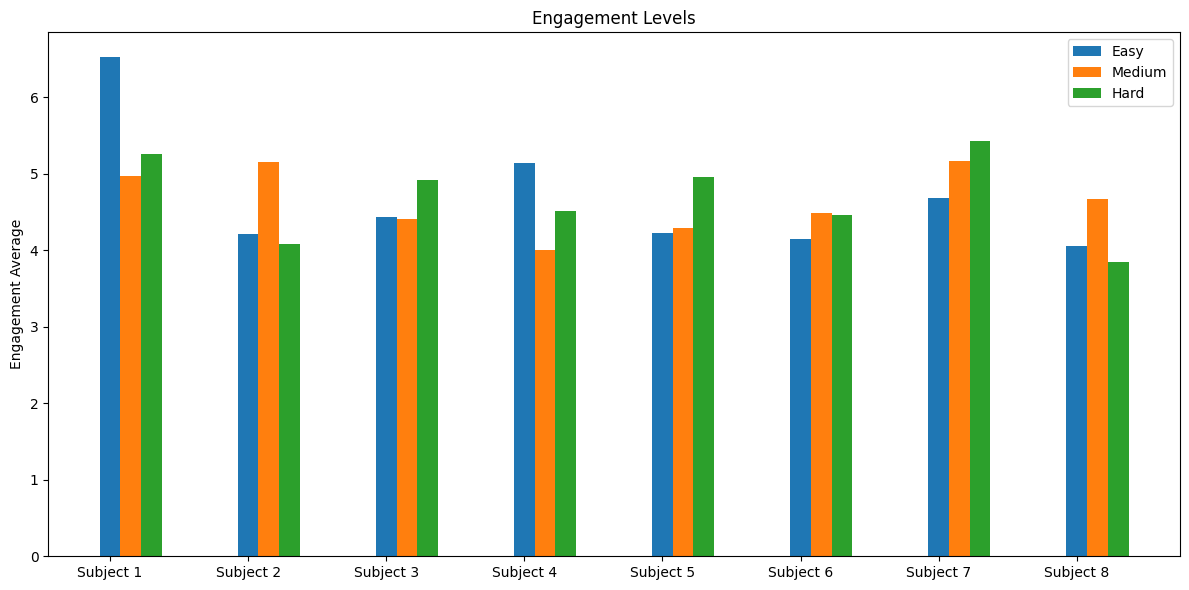

In [11]:
# Calculate mean
mean_easy = [np.mean(i) for i in easy_avg]
mean_hard = [np.mean(i) for i in hard_avg]
mean_ext  = [np.mean(i) for i in extreme_avg]

# Calculate standard deviation

# Plotting
labels = [f'Subject {i+1}' for i in range(8)]
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x,          mean_easy, width, label = "Easy", capsize = 5)
rects2 = ax.bar(x+ width,   mean_hard, width, label = "Medium", capsize = 5)
rects3 = ax.bar(x+ 2*width, mean_ext, width, label = "Hard", capsize = 5)


ax.set_ylabel("Engagement Average")
ax.set_title("Engagement Levels")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()